In [1]:
%matplotlib inline

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
# Filename
filename = './bird.jpg'
element = 'bird'

In [3]:
# Show original image

bird = cv.imread(filename=filename, flags=cv.IMREAD_COLOR)
cv.imshow(winname=element, mat=bird)
cv.waitKey(0)

-1

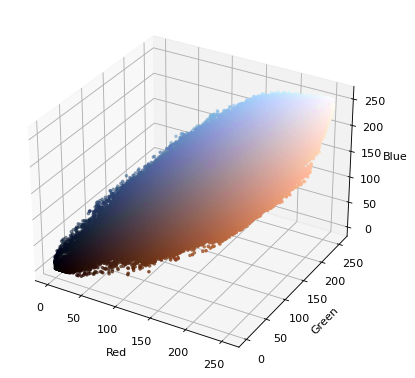

In [5]:
# Plotting RGB on 3D plot

r, g, b = cv.split(bird)

fig = plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = bird.reshape((np.shape(bird)[0] * np.shape(bird)[1], 3))
norm = colors.Normalize(vmin=-1.0, vmax=1.0)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(
    r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker="."
)
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

In [ ]:
# Plotting HSV on 3D plot

hsv_bird = cv.cvtColor(bird, cv.COLOR_RGB2HSV)
h, s, v = cv.split(hsv_bird)

fig = plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(
    h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker="."
)
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [ ]:
# Uncomment to select arbitrary values
# # Click on image to get color to highlight
# # Callback function
# def get_color(event,x,y,flags,param):
#     if (event == cv.EVENT_LBUTTONDOWN) & (get_color.count == 0):
#         get_color.coord_x_l = x
#         get_color.coord_y_l = y
#         get_color.count = get_color.count + 1
#     elif (event == cv.EVENT_LBUTTONDOWN) & (get_color.count == 1):
#         get_color.coord_x_d = x
#         get_color.coord_y_d = y
#         get_color.count = get_color.count + 1
# get_color.coord_x_l = 0
# get_color.coord_y_l = 0
# get_color.coord_x_d = 0
# get_color.coord_y_d = 0
# get_color.count = 0

# cv.namedWindow('bird')
# cv.setMouseCallback('bird',get_color)
# cv.imshow(winname='bird', mat=bird)
# cv.waitKey(0)

# print('coord light:')
# print('x:', get_color.coord_x_l, ' y: ', get_color.coord_y_l)
# print('coord light:')
# print('x:', get_color.coord_x_d, ' y: ', get_color.coord_y_d)

# light_hsv = hsv_bird[get_color.coord_y_l][get_color.coord_x_l]
# dark_hsv = hsv_bird[get_color.coord_y_d][get_color.coord_x_d]

# print('light color value:', light_hsv)
# print('dark color value:', dark_hsv)

# Comment to select arbitrary values
# Default values 
light_hsv = (0, 0, 238)
dark_hsv = (0, 0, 61)

# Segment bird
h, s, v = cv.split(hsv_bird)
mask = cv.inRange(h, np.array(dark_hsv[2]), np.array(light_hsv[2]))

cv.imshow(winname='mask', mat=mask)
cv.waitKey(0)

In [ ]:
bird_gs = cv.imread(filename=filename, flags=cv.IMREAD_GRAYSCALE)
stacked_img = np.stack((bird_gs,)*3, axis=-1)
r_gs, g_gs, b_gs = cv.split(stacked_img)
cv.imshow(winname='Grayscale '+element, mat=bird_gs)
cv.waitKey(0)

In [ ]:
c_mat = cv.merge([channel & ~mask for channel in (r,g,b)])
gs_mat = cv.merge([channel & mask for channel in (r_gs,g_gs,b_gs)])
new_bird = gs_mat + c_mat
cv.imshow(winname='Final', mat=new_bird)
cv.waitKey(0)

In [ ]:
tiny_new_bird = cv.resize(src=new_bird, fx=0.3, fy=0.3, dsize=(0,0))
tiny_bird = cv.resize(src=bird, fx=0.3, fy=0.3, dsize=(0,0))
new_mat = np.hstack((tiny_new_bird, tiny_bird))
cv.imshow(winname='Original vs Final', mat=new_mat)
cv.waitKey(0)